<a href="https://colab.research.google.com/github/Andre-jvz/SeriesDeTiempo-Tec/blob/main/Evidencia_series_de_timepo_A01732626.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instituto Tecnológico y de Estudios Superiores de Monterrey
##Series de tiempo Gpo 103
##Andre Villagrán Zamora
###Lic. en Finanzas, Primer periodo


#Introduccion:
###¿Qué es una serie de tiempo? 
Una serie de tiempo es una secuencia de datos numéricos que se recopilan y registran en intervalos de tiempo regulares, como días, meses, trimestres o años. Se utilizan para analizar patrones y tendencias en los datos a lo largo del tiempo y para realizar pronósticos de valores futuros.


###¿Qué enfoque se usa para realizar un pronóstico en github? 
En Github, se pueden utilizar diferentes enfoques para realizar un pronóstico de series de tiempo. Uno de los enfoques más comunes es el uso de modelos de aprendizaje automático, como los modelos ARIMA o LSTM, para hacer una predicción de los valores futuros de la serie de tiempo.

###¿Qué se necesita para pronosticar en ese enfoque? 
Para pronosticar en ese enfoque, se necesitan datos históricos de la serie de tiempo, así como una comprensión de las tendencias y patrones en los datos. También es importante tener un conjunto de datos de prueba para validar el modelo de pronóstico y ajustar los parámetros del modelo para obtener mejores resultados.


###¿Qué es diferenciar una serie? 
Diferenciar una serie se refiere a calcular la diferencia entre los valores observados de la serie de tiempo en un momento determinado y los valores observados en un momento anterior. Esto puede ayudar a estabilizar la varianza de la serie de tiempo y hacer que los datos sean más estacionarios, lo que puede facilitar el pronóstico de la serie de tiempo.


###¿El problema con el pronóstico de la serie?
El problema con el pronóstico de una serie de tiempo es que los patrones y tendencias en los datos pueden cambiar con el tiempo, lo que puede hacer que los modelos de pronóstico pierdan precisión y no sean capaces de predecir con exactitud los valores futuros. Además, los errores en la predicción pueden acumularse con el tiempo, lo que puede hacer que las predicciones sean menos precisas a medida que se avanza en el futuro.





#La inflación en México
### ¿Qué es la inflación? 
La inflación se refiere al aumento generalizado y sostenido en el tiempo del nivel de precios de bienes y servicios en una economía. La inflación se produce cuando hay un exceso de demanda de bienes y servicios en relación con la oferta disponible.
###¿Cómo se mide la inflación en México? 
En México, la inflación se mide a través del Índice Nacional de Precios al Consumidor (INPC), que es un indicador estadístico que mide los cambios en los precios de los bienes y servicios que se consumen en México.
###¿Qué es el INPC? 
El INPC es una herramienta importante para medir la inflación y también se utiliza para ajustar los salarios, las rentas y las tasas de interés en México. Además, el Banco de México utiliza el INPC para tomar decisiones sobre la política monetaria y establecer diferentes tasas de interes. 
###¿Cómo afecta la inflación a la planeación financiera de las empresas?
Cuando la inflación es alta, los precios de los insumos y los costos de producción pueden aumentar, lo que reduce los márgenes de beneficio y puede llevar a una disminución en la rentabilidad.

#El tipo de Cambio
###¿Qué es el tipo de cambio? 
Es la relación entre dos monedas diferentes, es decir, es el valor de una moneda en términos de otra. Se expresa como la cantidad de moneda nacional que se requiere para comprar una unidad de moneda extranjera. Lo cual aplicado a esta situacino problema seria. Cuantos pesos se requieren para comprar un dolar estadounidense.
###¿Qué es el tipo de cambio spot y forward?
El tipo de cambio spot es el tipo de cambio actual en el mercado, es decir, el precio al que se puede comprar o vender una moneda en el momento presente. Por otro lado, el tipo de cambio forward se refiere al precio acordado en el presente para una transacción de intercambio de moneda que se realizará en el futuro. Es decir, que son tipos de cambio para 2 diferentes situaciones. 
EJemplos de ambos tipos de cambio son: Si una empresa estadounidense desea comprar productos de una empresa europea y el tipo de cambio actual es de 1 USD por 0,85 EUR. Esto significa que por cada dólar estadounidense, la empresa europea recibiría 0,85 euros en el momento de la transacción. 
En el caso de cambio foward
###¿Cuál es el tipo de cambio fix? 
El tipo de cambio fix es un tipo de cambio fijo establecido por un banco central o autoridad monetaria para controlar la fluctuación de los tipos de cambio. Se utiliza principalmente para mantener la estabilidad en los mercados de divisas. 
Si una empresa estadounidense va a comprar productos de una empresa mexicana en seis meses y desea protegerse contra la fluctuación del tipo de cambio durante este tiempo. La empresa podría acordar un tipo de cambio forward con el banco, que fije el precio de la transacción en el momento actual y que se aplicará en el futuro. 
###¿Cómo afecta financieramente a las empresas el tipo de cambio?
Si una empresa importa materias primas o bienes de otro país, un aumento en el tipo de cambio puede hacer que estos productos sean más caros. Por otro lado, si una empresa exporta sus productos, un aumento en el tipo de cambio puede hacer que sus productos sean más caros para los compradores extranjeros, lo que puede afectar la demanda y las ganancias de la empresa.

#Pronostico tipo de cambio


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
plt.rcParams['figure.figsize']=[12,6]

In [ ]:
tipocambio = pd.read_csv("/content/drive/MyDrive/database.csv")


In [ ]:
tipocambio.tail()

,Date,Tcambio
257,03/03/2023,18.105301
258,06/03/2023,17.978001
259,07/03/2023,18.001350
260,08/03/2023,18.100100
261,09/03/2023,18.030001


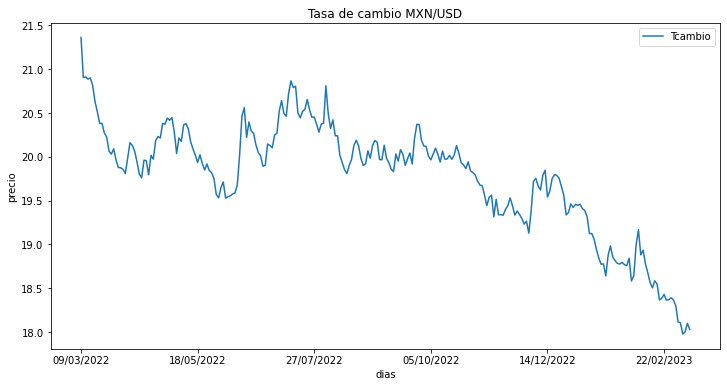

In [ ]:
tipocambio = tipocambio.set_index("Date")
tipocambio.plot()
plt.title('Tasa de cambio MXN/USD')
plt.xlabel('dias')
plt.ylabel('precio')
plt.show()

In [ ]:
result_adf = adfuller(tipocambio["Tcambio"])
print('p-value: %.2f' % result_adf[1])

p-value: 0.56


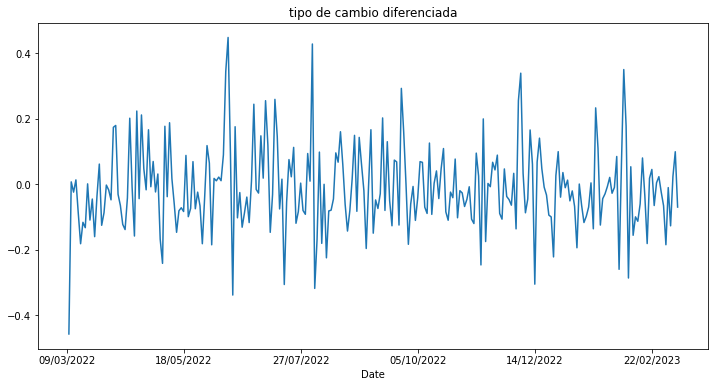

In [ ]:
tipocambio["tipo de cambio diff"] = tipocambio["Tcambio"].diff()
tipocambio["tipo de cambio diff"].plot()
plt.title("tipo de cambio diferenciada")
plt.show()

In [ ]:
result_adf = adfuller(tipocambio['tipo de cambio diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


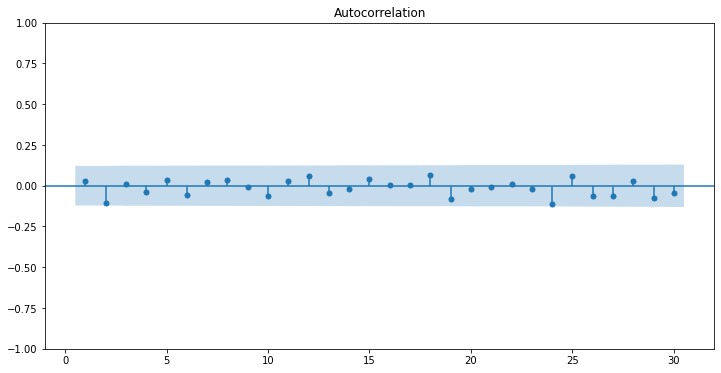

In [ ]:
plot_acf(tipocambio["tipo de cambio diff"].dropna(), zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


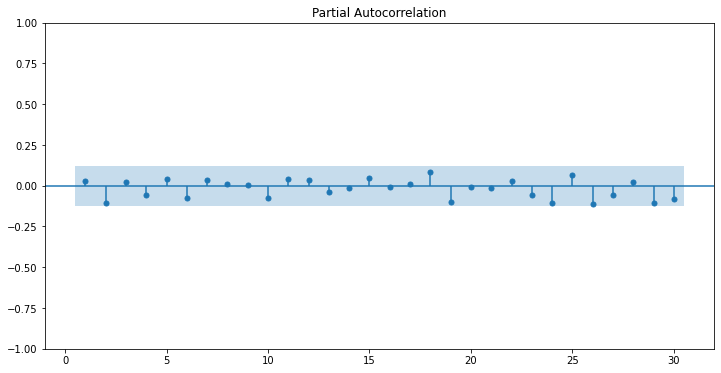

In [ ]:
plot_pacf(tipocambio["tipo de cambio diff"].dropna(), zero = False,  lags=30);

In [ ]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(tipocambio["tipo de cambio diff"].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 0, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 0, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 0, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 0, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 1, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 1, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 1, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 1, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 1, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 2, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 2, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 2, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 2, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/b

AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 3, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/b

AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '23/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '24/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '27/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '28/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0  -329.832330 -322.703289
   1  -328.141005 -317.447444
   2  -329.849650 -315.591569
   3  -328.108606 -310.286004
   4  -327.127872 -305.740750
1  0  -328.071065 -317.377504
   1  -330.454933 -316.196851
   2  -329.454384 -311.631781
   3  -327.701502 -306.314380
   4  -326.139372 -301.187729
2  0  -329.278500 -315.020418
   1  -329.347842 -311.525240
   2  -327.837616 -306.450494
   3  -325.988839 -301.037196
   4  -324.166740 -295.650576
3  0  -327.391336 -309.568734
   1  -327.601398 -306.214275
   2  -326.383677 -301.432034
   3  -324.883451 -296.367288
   4  -322.054349 -289.973665
4  0  -326.230522 -304.843400
   1  -326.173383 -301.221740
   2  -324.014164 -295.498001
   3  -322.147669 -290.066985
   4  -320.145350 -284.500146

In [ ]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
1  1  -330.454933 -316.196851
0  2  -329.849650 -315.591569
   0  -329.832330 -322.703289
1  2  -329.454384 -311.631781
2  1  -329.347842 -311.525240
   0  -329.278500 -315.020418
0  1  -328.141005 -317.447444
   3  -328.108606 -310.286004
1  0  -328.071065 -317.377504
2  2  -327.837616 -306.450494
1  3  -327.701502 -306.314380
3  1  -327.601398 -306.214275
   0  -327.391336 -309.568734
0  4  -327.127872 -305.740750
3  2  -326.383677 -301.432034
4  0  -326.230522 -304.843400
   1  -326.173383 -301.221740
1  4  -326.139372 -301.187729
2  3  -325.988839 -301.037196
3  3  -324.883451 -296.367288
2  4  -324.166740 -295.650576
4  2  -324.014164 -295.498001
   3  -322.147669 -290.066985
3  4  -322.054349 -289.973665
4  4  -320.145350 -284.500146

In [ ]:
modelo1 = ARIMA(tipocambio ["Tcambio"].dropna(), order=(1, 0, 1))
resultado1 = modelo1.fit()
print(resultado1.summary() )

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:557: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.9/dist-packag

                               SARIMAX Results                                
Dep. Variable:                Tcambio   No. Observations:                  262
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 164.503
Date:                Wed, 15 Mar 2023   AIC                           -321.006
Time:                        23:25:46   BIC                           -306.733
Sample:                             0   HQIC                          -315.269
                                - 262                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7386      0.858     23.003      0.000      18.057      21.420
ar.L1          0.9924      0.012     80.801      0.000       0.968       1.017
ma.L1          0.0561      0.054      1.044      0.2

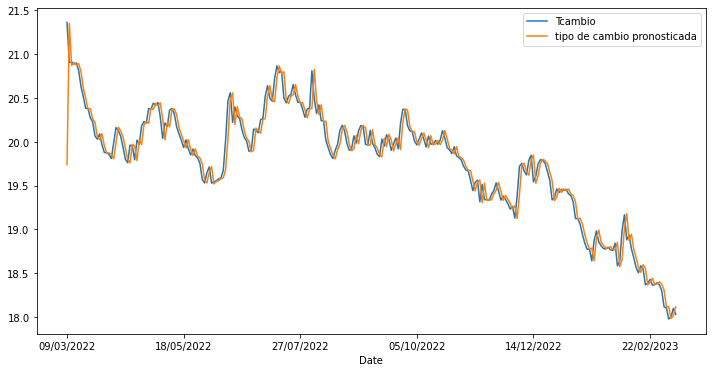

In [ ]:
tipocambio['tipo de cambio pronosticada'] = resultado1.predict()
tipocambio[['Tcambio', 'tipo de cambio pronosticada']].plot();

In [ ]:
tipocambio.describe()

,Tcambio,tipo de cambio diff,tipo de cambio pronosticada
count,262.000000,261.000000,262.000000
mean,19.770887,-0.012768,19.776477
std,0.639858,0.127895,0.626951
min,17.978001,-0.457201,17.983507
25%,19.444049,-0.087499,19.451349
50%,19.928050,-0.024491,19.922981
75%,20.175400,0.059361,20.169790
max,21.362391,0.447340,21.351353


In [ ]:
tipocambio.tail()

,Tcambio,tipo de cambio diff,tipo de cambio pronosticada
Date,,,
03/03/2023,18.105301,-0.010670,18.117478
06/03/2023,17.978001,-0.127300,18.116958
07/03/2023,18.001350,0.023349,17.983507
08/03/2023,18.100100,0.098750,18.015476
09/03/2023,18.030001,-0.070099,18.117227


In [ ]:
resultado1.predict(262, 264)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


262    18.038016
263    18.050864
264    18.063615
Name: predicted_mean, dtype: float64

#Pronostico inflacion México


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
plt.rcParams['figure.figsize']=[12,6]
inflacion_mex = pd.read_excel('/content/drive/MyDrive/inflacionMx.xlsx')
inflacion_mex.tail()


,fecha,inflacion
273,2022/10,8.41
274,2022/11,7.80
275,2022/12,7.82
276,2023/01,7.91
277,2023/02,7.62


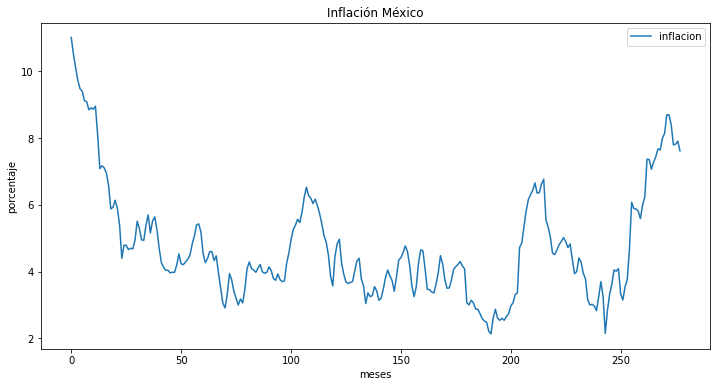

In [ ]:
inflacion_mex.plot()
plt.title('Inflación México')
plt.xlabel('meses')
plt.ylabel('porcentaje')
plt.show()

In [ ]:
result_adf = adfuller(inflacion_mex["inflacion"])
print('p-value: %.2f' % result_adf[1])

p-value: 0.05


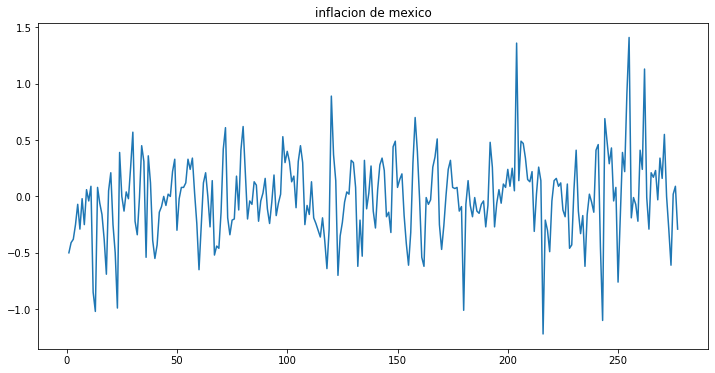

In [ ]:
inflacion_mex["inflacion diff"] = inflacion_mex["inflacion"].diff()
inflacion_mex["inflacion diff"].plot()
plt.title("inflacion de mexico")
plt.show()

In [ ]:
result_adf = adfuller(inflacion_mex['inflacion diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


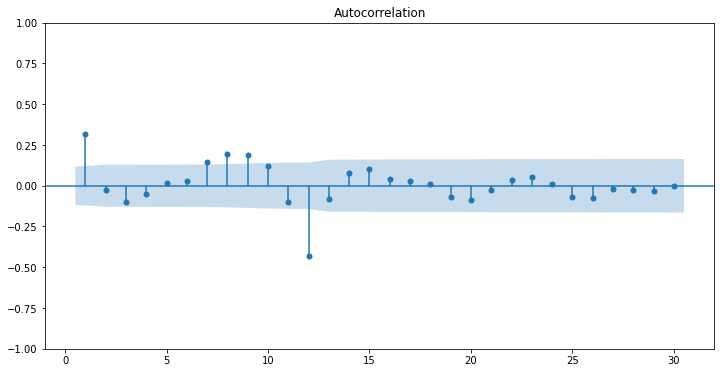

In [ ]:
plot_acf(inflacion_mex["inflacion diff"].dropna(), zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


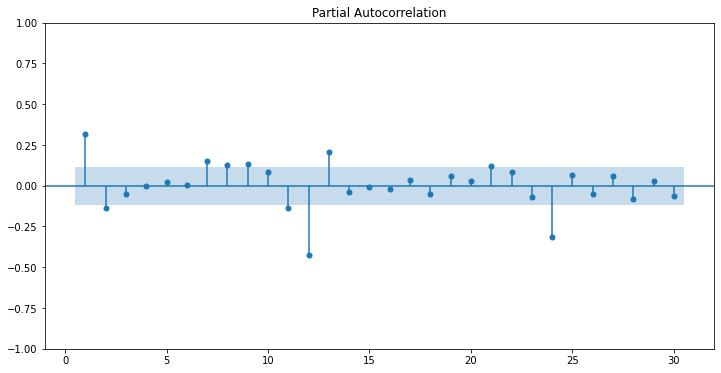

In [ ]:
plot_pacf(inflacion_mex["inflacion diff"].dropna(), zero = False,  lags=30);

In [ ]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(inflacion_mex['inflacion'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 4
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 4
AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 2
AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/

AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC          BIC
AR MA                          
0  0   1079.576561  1086.831803
   1    734.052211   744.935074
   2    553.048280   567.558765
   3    395.499954   413.638059
   4    353.184778   374.950505
1  0    231.989062   242.871926
   1    200.447598   214.958083
   2    201.946460   220.084565
   3    203.084608   224.850334
   4    204.305992   229.699340
2  0    203.358441   217.868925
   1    202.098798   220.236903
   2    203.736207   225.501934
   3    204.792430   230.185778
   4    189.447987   218.468955
3  0    200.949875   219.087980
   1    189.945214   211.710941
   2    204.366460   229.759808
   3    178.299147   207.320116
   4    177.894045   210.542635
4  0    202.420755   224.186482
   1    190.349870   215.743218
   2    206.099335   235.120304
   3    162.984524   195.633114
   4    177.827906   214.104117

In [ ]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
4  3    162.984524   195.633114
   4    177.827906   214.104117
3  4    177.894045   210.542635
   3    178.299147   207.320116
2  4    189.447987   218.468955
3  1    189.945214   211.710941
4  1    190.349870   215.743218
1  1    200.447598   214.958083
3  0    200.949875   219.087980
1  2    201.946460   220.084565
2  1    202.098798   220.236903
4  0    202.420755   224.186482
1  3    203.084608   224.850334
2  0    203.358441   217.868925
   2    203.736207   225.501934
1  4    204.305992   229.699340
3  2    204.366460   229.759808
2  3    204.792430   230.185778
4  2    206.099335   235.120304
1  0    231.989062   242.871926
0  4    353.184778   374.950505
   3    395.499954   413.638059
   2    553.048280   567.558765
   1    734.052211   744.935074
   0   1079.576561  1086.831803

In [ ]:
modelo1 = ARIMA(inflacion_mex ["inflacion"].dropna(), order=(1, 0, 1))
resultado1 = modelo1.fit()
print(resultado1.summary() )

                               SARIMAX Results                                
Dep. Variable:              inflacion   No. Observations:                  278
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -96.224
Date:                Wed, 15 Mar 2023   AIC                            200.448
Time:                        23:45:29   BIC                            214.958
Sample:                             0   HQIC                           206.269
                                - 278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1010      1.069      5.707      0.000       4.006       8.196
ar.L1          0.9830      0.010    101.776      0.000       0.964       1.002
ma.L1          0.3515      0.052      6.723      0.0

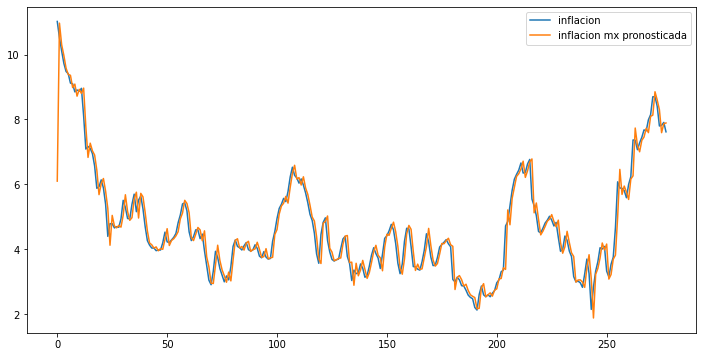

In [ ]:
inflacion_mex['inflacion mx pronosticada'] = resultado1.predict()
inflacion_mex[['inflacion', 'inflacion mx pronosticada']].plot();

In [ ]:
inflacion_mex.describe()

,inflacion,inflacion diff,inflacion mx pronosticada
count,278.000000,277.000000,278.000000
mean,4.751511,-0.012274,4.760329
std,1.677582,0.361811,1.653769
min,2.130000,-1.220000,1.885838
25%,3.625000,-0.220000,3.675600
50%,4.290000,-0.010000,4.314446
75%,5.462500,0.210000,5.530234
max,11.020000,1.410000,10.968408


In [ ]:
inflacion_mex.tail()

,fecha,inflacion,inflacion diff,inflacion mx pronosticada
273,2022/10,8.41,-0.29,8.601373
274,2022/11,7.80,-0.61,8.303422
275,2022/12,7.82,0.02,7.594140
276,2023/01,7.91,0.09,7.870106
277,2023/02,7.62,-0.29,7.893215


In [ ]:
resultado1.predict(280, 285)

280    7.450934
281    7.427946
282    7.405350
283    7.383138
284    7.361305
285    7.339843
Name: predicted_mean, dtype: float64